## Task - 3 Technical Analysis

We applied three key technical indicators for trend analysis:

1. **Relative Strength Index (RSI):** A momentum oscillator that measures the speed and change of price movements.

2. **Bollinger Bands:** Volatility bands placed above and below a moving average. They are used to identify overbought or oversold conditions.

3. **Moving Average (MA):** A trend-following indicator that smoothens price data to create a single flowing line.


In [14]:
pip install ta

Note: you may need to restart the kernel to use updated packages.


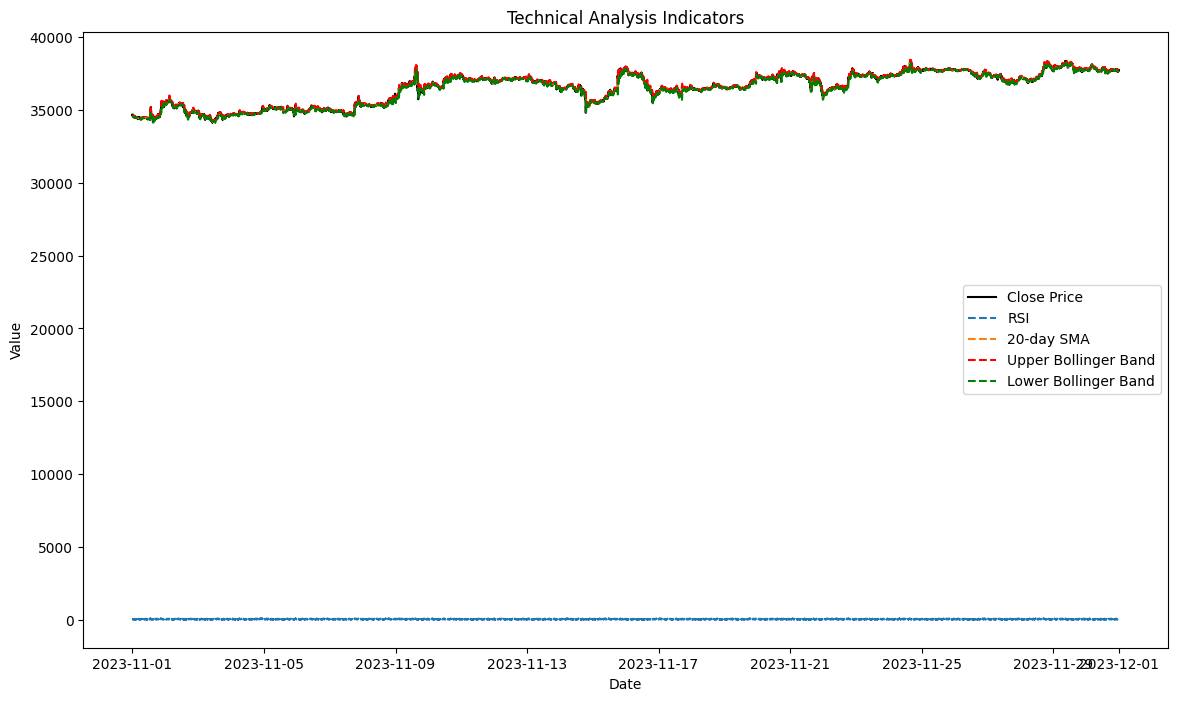

In [15]:
import pandas as pd
import ta
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/stockprice/BTCUSDT-1m-2023-11.csv")

df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')

df.set_index('open_time', inplace=True)

# Calculate RSI (Relative Strength Index)
df['rsi'] = ta.momentum.RSIIndicator(df['close']).rsi()

# Calculate SMA (Simple Moving Average)
df['ma'] = ta.trend.SMAIndicator(df['close'], window=20).sma_indicator()

# Calculate Bollinger Bands
indicator_bb = ta.volatility.BollingerBands(df['close'])
df['bb_upper'] = indicator_bb.bollinger_hband()
df['bb_lower'] = indicator_bb.bollinger_lband()

plt.figure(figsize=(14, 8))
plt.plot(df.index, df['close'], label='Close Price', color='black')

# Plotting RSI
plt.plot(df.index, df['rsi'], label='RSI', linestyle='dashed')

# Plotting SMA
plt.plot(df.index, df['ma'], label='20-day SMA', linestyle='dashed')

# Plotting Bollinger Bands
plt.plot(df.index, df['bb_upper'], label='Upper Bollinger Band', linestyle='dashed', color='red')
plt.plot(df.index, df['bb_lower'], label='Lower Bollinger Band', linestyle='dashed', color='green')

plt.legend()
plt.title('Technical Analysis Indicators')
plt.xlabel('Date')
plt.ylabel('Value')


# Show the plot
plt.show()


## Trend Identification

### RSI Analysis
- **Overbought Conditions:** RSI > 70
- **Oversold Conditions:** RSI < 30

### Bollinger Bands Analysis
- **Upper Band Cross:** Potential overbought condition
- **Lower Band Cross:** Potential oversold condition




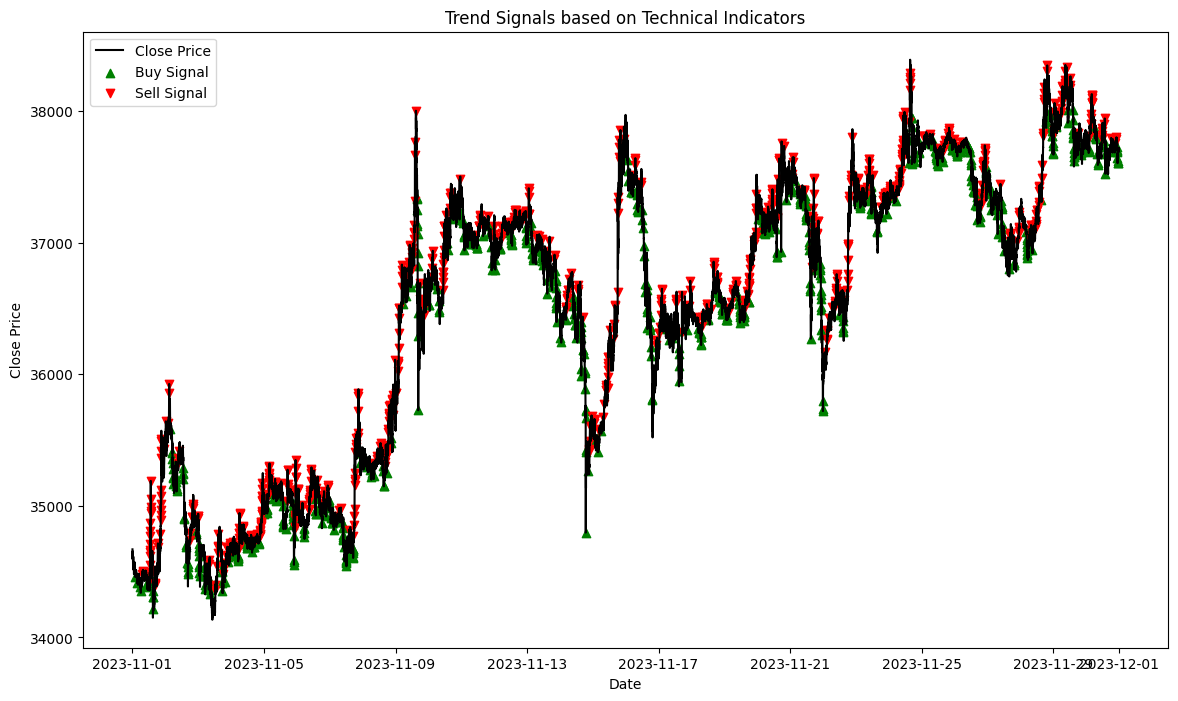

In [13]:
df['buy_signal'] = (
    (df['rsi'] < 30) &            # RSI below 30 (oversold condition)
    (df['close'] < df['bb_lower']) # Close price below lower Bollinger Band
)

df['sell_signal'] = (
    (df['rsi'] > 70) &            # RSI above 70 (overbought condition)
    (df['close'] > df['bb_upper']) # Close price above upper Bollinger Band
)


plt.figure(figsize=(14, 8))
plt.plot(df.index, df['close'], label='Close Price', color='black')
plt.scatter(df[df['buy_signal']].index, df[df['buy_signal']]['close'], marker='^', color='g', label='Buy Signal')
plt.scatter(df[df['sell_signal']].index, df[df['sell_signal']]['close'], marker='v', color='r', label='Sell Signal')

plt.legend()
plt.title('Trend Signals based on Technical Indicators')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.show()

## Conclusion

The visual representation provided by the plot enhances the interpretation of trends and signals identified through the technical analysis. Traders and analysts can use this dynamic plot to gain a deeper understanding of the historical price movements and make more informed decisions in their trading strategies.